# Course Work - Part 5 - Advanced Algorithms - Fully Convolutional Network (FCN) 
Based on TensorFlow Core Tutorials https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load Data

In [3]:
import pandas as pd
XTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_train_all.csv')
YTrain = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_train_all.csv')
XTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\x_test_all.csv')
YTest = pd.read_csv('Traffic_Sign\\CompleteDataSet\\y_test_all.csv')

In [4]:
XTest.shape

(3090, 2304)

In [5]:
x_train=np.reshape(np.array(XTrain), (9690,48,48))
x_test=np.reshape(np.array(XTest), (3090,48,48))
y_train=np.reshape(np.array(YTrain), -1)
y_test=np.reshape(np.array(YTest), -1)
y_train_input=np.reshape(np.array(XTrain), (9690,48,48))

In [6]:
y_train_input.shape

(9690, 48, 48)

In [7]:
class_names = ['Speed 20', 'Speed 30', 'Speed 50', 'Speed 60', 'Speed 70',
               'Left Turn', 'Right Turn', 'Beware Pedestrian Crossing', 'Beware Children', 'Beware Cycle Route Ahead']

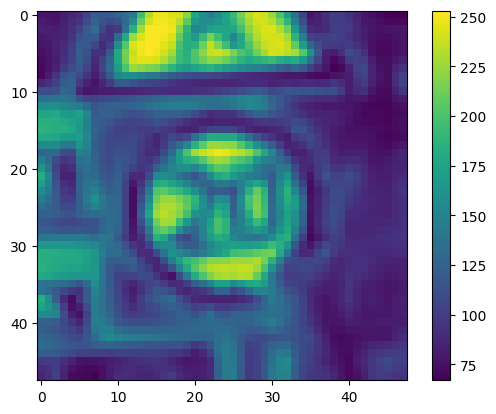

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
print(y_train[0])

0


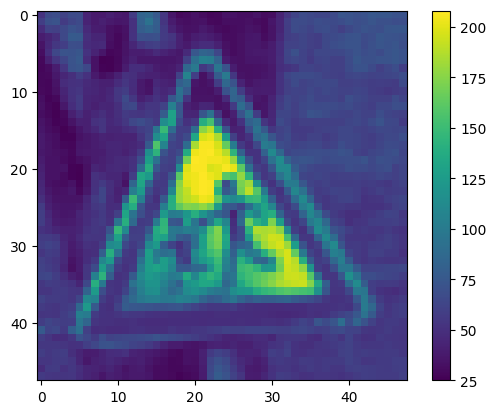

In [10]:
plt.imshow(x_train[8990])
plt.colorbar()
plt.grid(False)

In [11]:
print(x_train[2])

[[ 72.  75.  79. ...  76.  70.  65.]
 [ 70.  73.  77. ...  78.  73.  69.]
 [ 68.  71.  76. ...  79.  76.  74.]
 ...
 [119. 116. 113. ...  79.  86.  92.]
 [ 95.  96.  98. ...  80.  88.  94.]
 [ 77.  81.  86. ...  80.  89.  95.]]


In [12]:
print(y_train[2])

0


# Normalizing

In [13]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

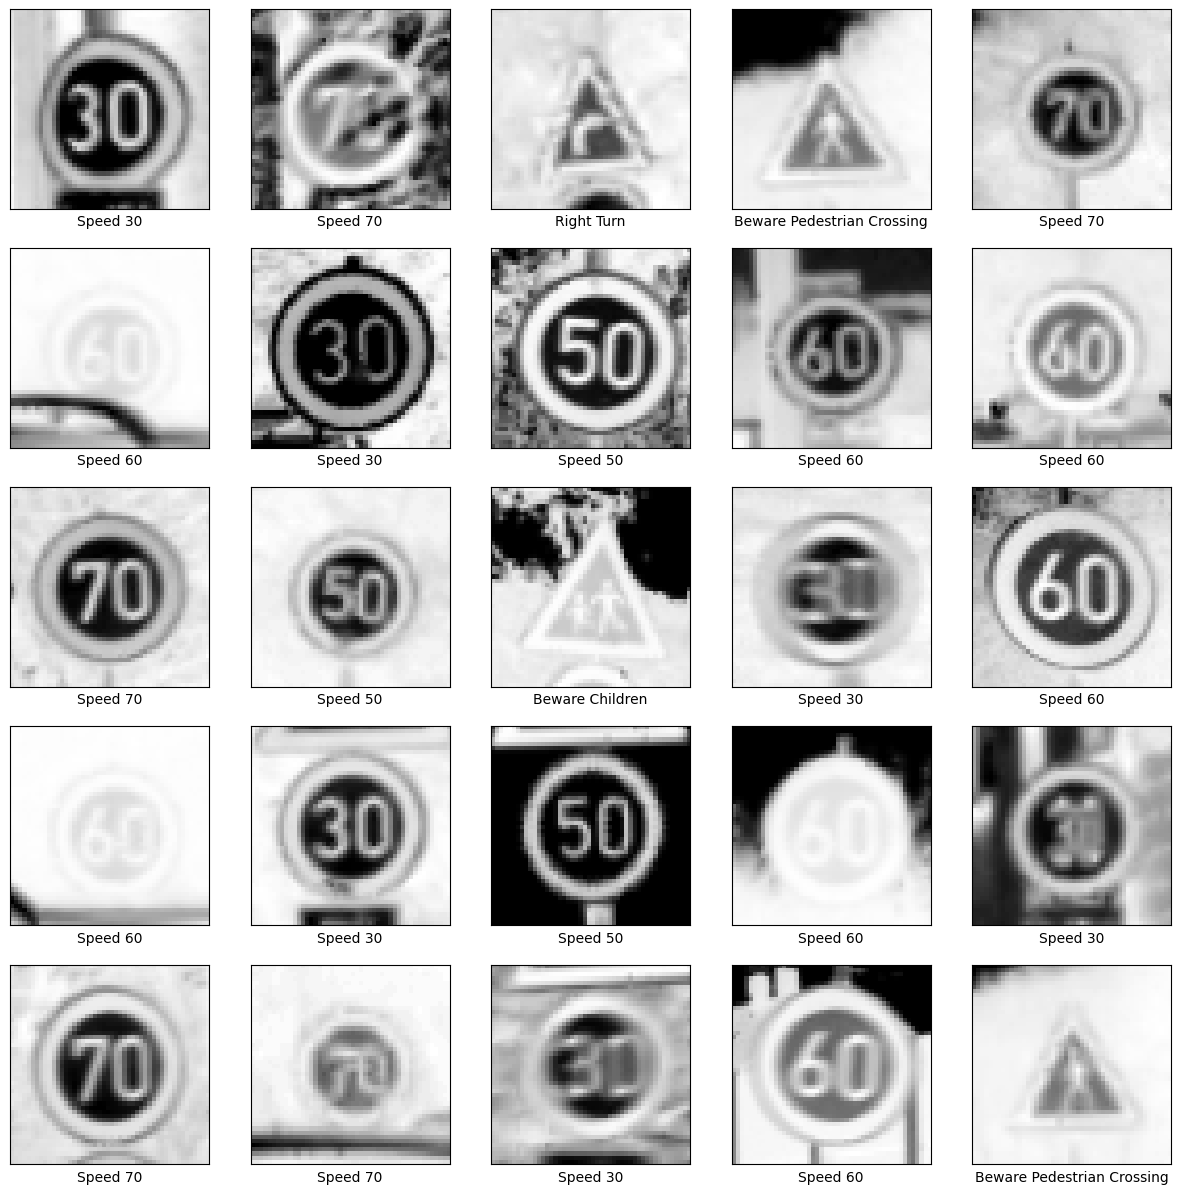

In [14]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [15]:
x_train.shape #28*28=784

(9690, 48, 48)

# Building an FCN model

In [41]:
x_train=np.reshape(np.array(XTrain), (9690,48,48))
x_test=np.reshape(np.array(XTest), (3090,48,48))
y_train=np.reshape(np.array(YTrain), -1)
y_test=np.reshape(np.array(YTest), -1)
x_train  = x_train / 255.0
x_test = x_test / 255.0
#x_train = np.reshape(x_train, (x_train.shape[0], -1))
#x_test = np.reshape(x_test, (x_test.shape[0], -1))

In [42]:
y_train.shape

(9690,)

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Assume X_train has shape (9690, 48, 48) and Y_train has shape (9690,)
# Replace this with your actual data

# Model Definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
#model.add(layers.UpSampling2D((2, 2)))
#model.add(layers.Conv2DTranspose(10, (3, 3), activation='sigmoid', padding='same'))

# Add a Dense layer for classification with 10 units and softmax activation
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [44]:
# Model Training
history = model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
243/243 [==============================] - 22s 88ms/step - loss: 1.2335 - accuracy: 0.4532 - val_loss: 20.5569 - val_accuracy: 0.1460
Epoch 2/2
243/243 [==============================] - 20s 82ms/step - loss: 0.2352 - accuracy: 0.9212 - val_loss: 33.2072 - val_accuracy: 0.1615


In [ ]:
history

In [45]:
import matplotlib.pyplot as plt

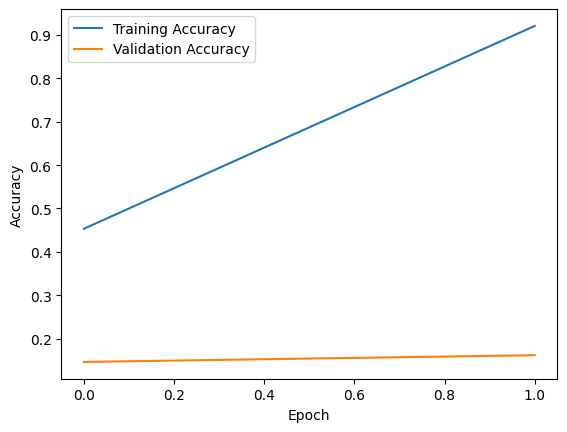

In [46]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

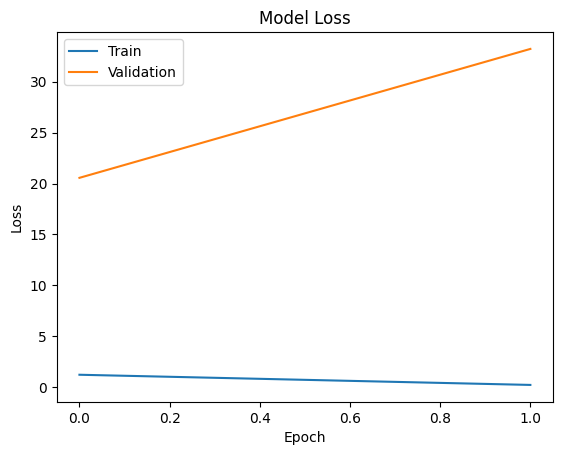

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
# Model Training
history1 = model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
243/243 [==============================] - 23s 96ms/step - loss: 0.0744 - accuracy: 0.9765 - val_loss: 33.2838 - val_accuracy: 0.1600
Epoch 2/5
243/243 [==============================] - 18s 75ms/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 30.3665 - val_accuracy: 0.1605
Epoch 3/5
243/243 [==============================] - 20s 81ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 25.0236 - val_accuracy: 0.1594
Epoch 4/5
243/243 [==============================] - 25s 104ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 29.5524 - val_accuracy: 0.1631
Epoch 5/5
243/243 [==============================] - 25s 104ms/step - loss: 0.0141 - accuracy: 0.9954 - val_loss: 34.6723 - val_accuracy: 0.1625


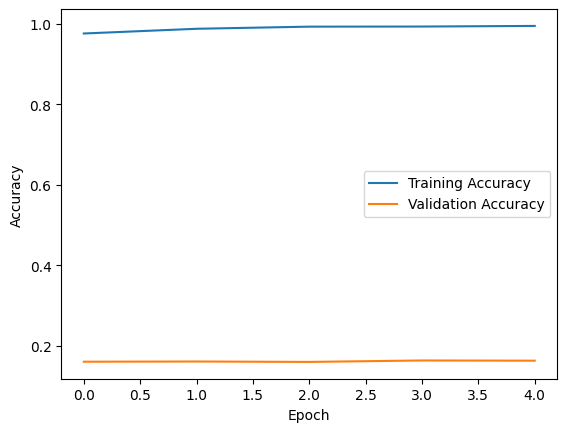

In [49]:
# Plot training history (optional)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

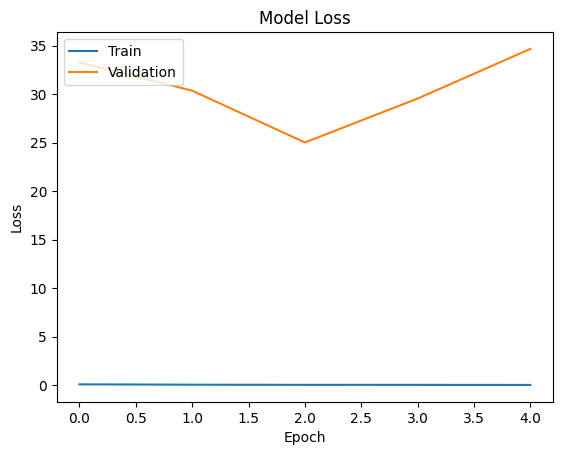

In [50]:
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
classifications = model.predict(x_test)

97/97 [==============================] - 2s 23ms/step


In [52]:
class_names[np.argmax(classifications[0])]

'Speed 30'

In [53]:
X_Test_Sample=np.reshape(np.array(XTest), (3090,48,48))
Y_Test_Sample=np.reshape(np.array(YTest), -1)

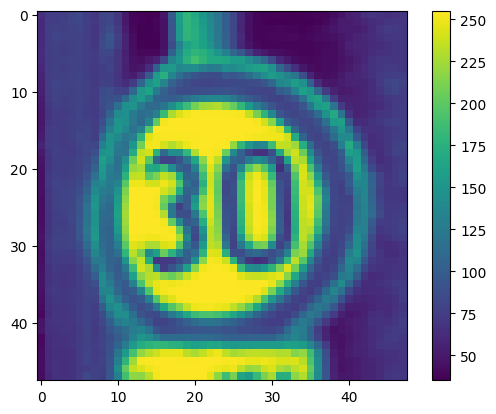

In [54]:
plt.imshow(X_Test_Sample[0])
plt.colorbar()
plt.grid(False)

In [55]:
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [56]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

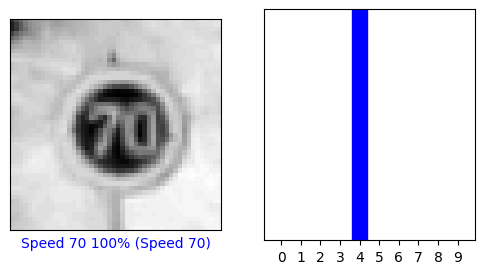

In [57]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_Test_Sample)
plt.show()

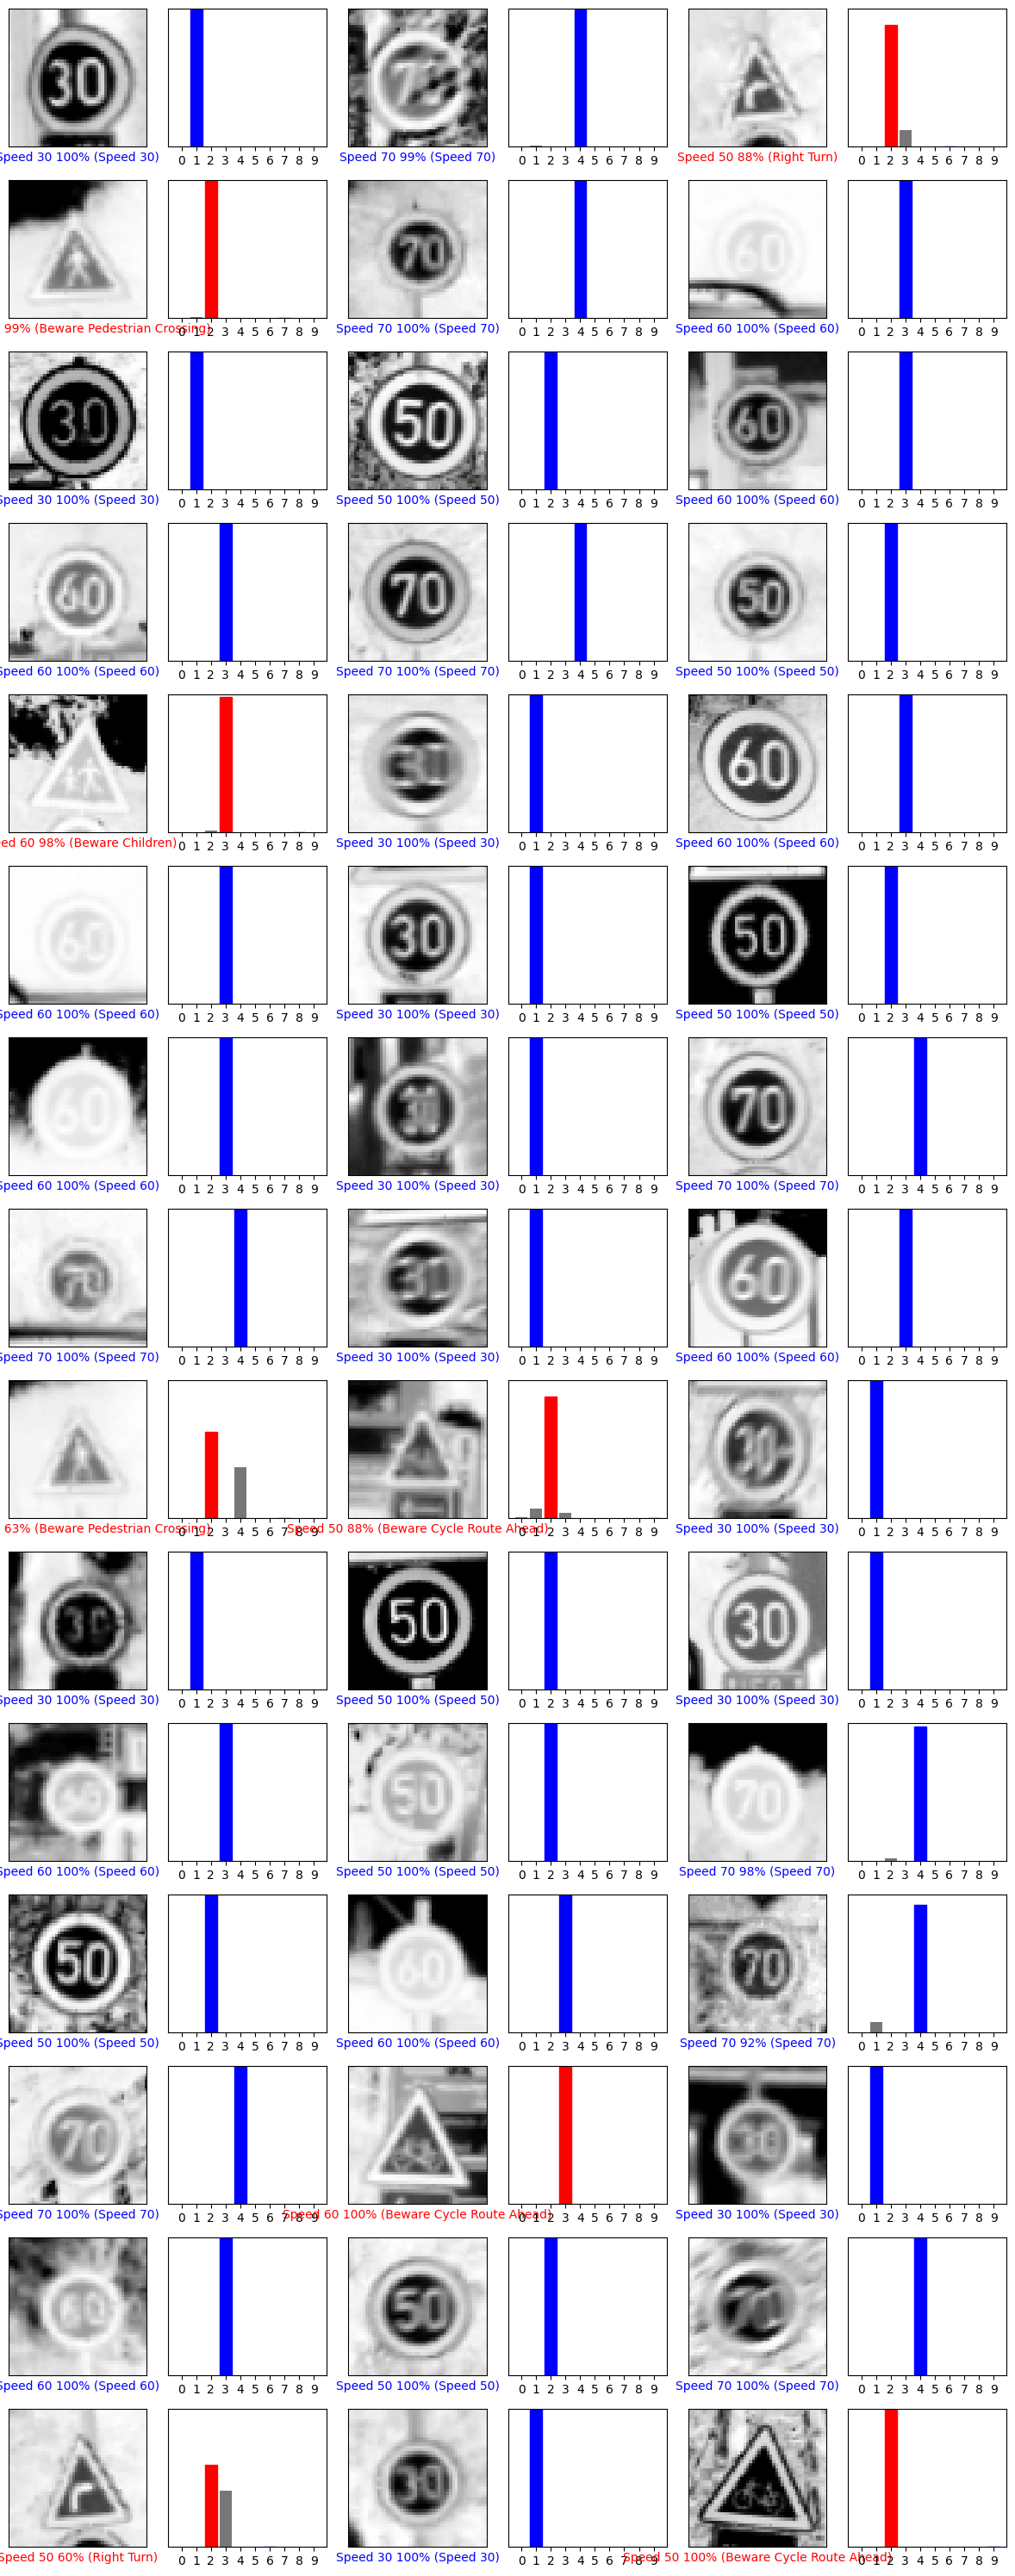

In [58]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], Y_Test_Sample)
plt.tight_layout()
plt.show()

# ANN

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer
from sklearn.preprocessing import StandardScaler

In [25]:
def create_mlp_model(hidden_layer_sizes=(128,), activation='relu', learning_rate=0.01, momentum=0.9):
    model = Sequential()
    for units in hidden_layer_sizes:
        model.add(Dense(units, activation=activation))
    model.add(Dense(10, activation='softmax'))  # Adjust the output layer based on the number of classes

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
def runMLPWithParam(X_train, X_test, y_train, y_test,model, epoch):
    # Standardize the data (optional but often beneficial)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('-----------------------------')
    print(f'Test Accuracy: {test_accuracy}')

    # Plot training history (optional)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Define hyperparameters to experiment with
hyperparameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'momentum': [0.9, 0.95, 0.99],
    'epochs': [10, 20, 30]
}

In [27]:
x_train=np.reshape(np.array(XTrain), (9690,48,48))
x_test=np.reshape(np.array(XTest), (3090,48,48))
y_train=np.reshape(np.array(YTrain), -1)
y_test=np.reshape(np.array(YTest), -1)
x_train  = x_train / 255.0
x_test = x_test / 255.0
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

# Relu - Increased momentum results in poor accuracy

# Relu - High learning rate produces high loss, poor accuracy

# Increasing the no. of epochs above 10, does not make considerable difference in accuracy, but brings high loss

# Relu - Best Results at Epoch 8, Hidden layers 5, Learnin Rate =0.001, Momentum = 0.9

Epoch 1/8
243/243 [==============================] - 2s 7ms/step - loss: 1.6201 - accuracy: 0.4306 - val_loss: 3.0575 - val_accuracy: 0.1424
Epoch 2/8
243/243 [==============================] - 2s 8ms/step - loss: 1.0158 - accuracy: 0.6415 - val_loss: 3.5320 - val_accuracy: 0.1455
Epoch 3/8
243/243 [==============================] - 7s 27ms/step - loss: 0.8158 - accuracy: 0.7060 - val_loss: 3.4981 - val_accuracy: 0.1244
Epoch 4/8
243/243 [==============================] - 1s 3ms/step - loss: 0.6539 - accuracy: 0.7740 - val_loss: 3.6758 - val_accuracy: 0.1295
Epoch 5/8
243/243 [==============================] - 1s 3ms/step - loss: 0.5448 - accuracy: 0.8137 - val_loss: 3.8032 - val_accuracy: 0.1404
Epoch 6/8
243/243 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.8473 - val_loss: 3.7395 - val_accuracy: 0.1481
Epoch 7/8
243/243 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 0.8665 - val_loss: 4.0829 - val_accuracy: 0.1440
Epoch 8/8
97

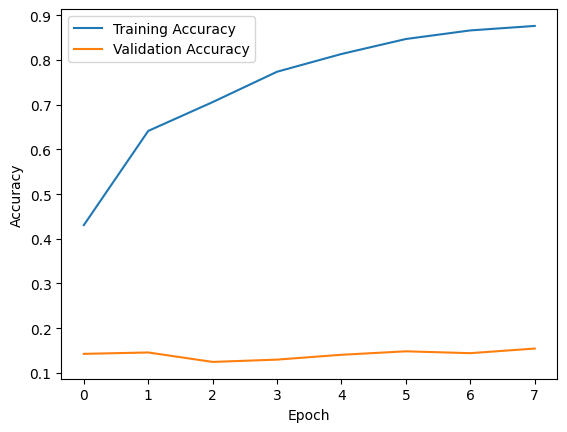

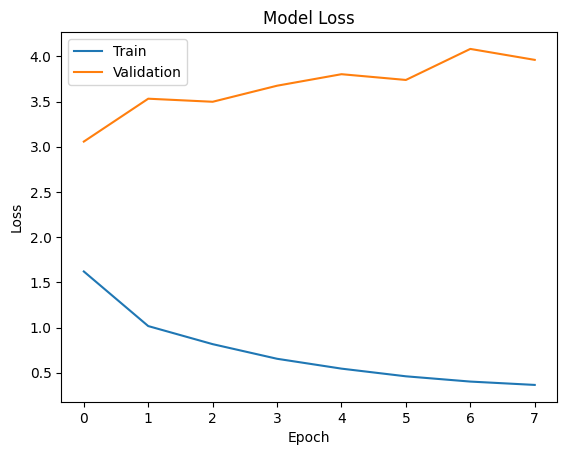

In [28]:
hidden_layer_sizes=(5,)
activation='relu'
learning_rate=0.001
momentum=0.9
epochs = 8
model = create_mlp_model(hidden_layer_sizes, activation, learning_rate, momentum)
runMLPWithParam(x_train, x_test, y_train, y_test,model, epochs)

# Evaluate

In [29]:
test_loss, test_acc = model.evaluate(x_test,  y_test)
print('\nTest accuracy:', test_acc)

97/97 [==============================] - 0s 1ms/step - loss: 1.5657 - accuracy: 0.4634

Test accuracy: 0.4634304344654083


verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.

# Prediction

In [30]:
classifications = model.predict(x_test)

97/97 [==============================] - 0s 2ms/step


In [31]:
print(classifications[10])


[0.1168288  0.28725937 0.2012721  0.02334963 0.17468232 0.04142739
 0.05809563 0.03612395 0.03428472 0.02667616]


In [32]:
np.argmax(classifications[0])

1

In [33]:
np.max(classifications[0])

0.52944285

In [34]:
class_names[np.argmax(classifications[0])]

'Speed 30'

In [35]:
X_Test_Sample=np.reshape(np.array(XTest), (3090,48,48))
Y_Test_Sample=np.reshape(np.array(YTest), -1)

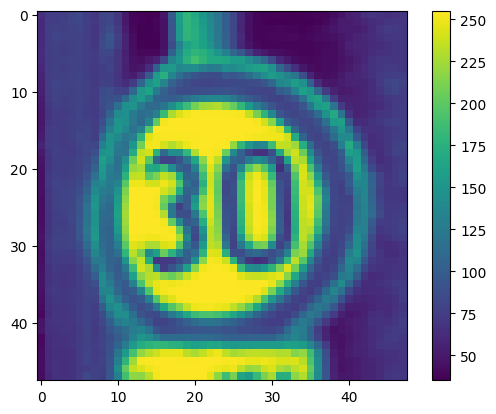

In [36]:
plt.imshow(X_Test_Sample[0])
plt.colorbar()
plt.grid(False)

In [37]:
def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [38]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

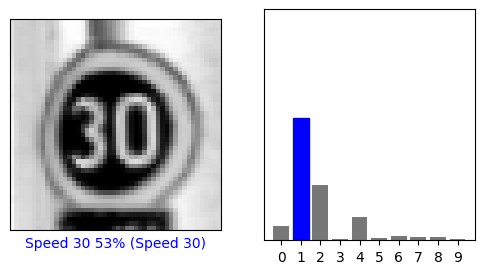

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_Test_Sample)
plt.show()

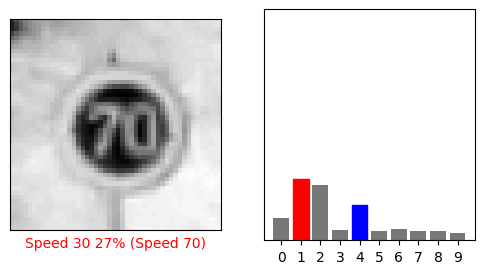

In [40]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_Test_Sample)
plt.show()

In [ ]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], Y_Test_Sample, X_Test_Sample)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], Y_Test_Sample)
plt.tight_layout()
plt.show()